<a href="https://colab.research.google.com/github/vaibhavranaaa/MyRepo/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

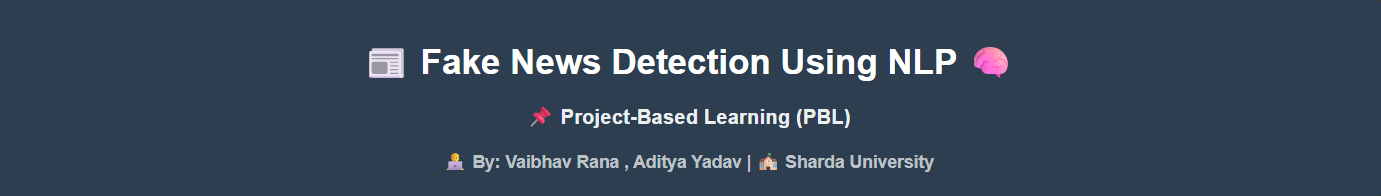

1.Import Libaries


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 🔎 Observation:
- Successfully imported necessary libraries such as pandas, numpy, sklearn, and matplotlib.
- These libraries will help in data loading, preprocessing, model training, and visualization.


2. Load and Combine the Data

In [ ]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

true['label'] = 1  # Real news = 1
fake['label'] = 0  # Fake news = 0

df = pd.concat([true, fake])
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data

print(df.shape)
df.head()


(44898, 5)


,title,text,subject,date,label
0,NEW EMAILS SHOW HILLARY Asking How Meeting On ...,These grifters have no shame. How much more ev...,Government News,"Feb 9, 2016",0
1,POPULAR CHRISTIAN AUTHOR EXPLAINS Why Christia...,The popular Christian author Eric Metaxas real...,politics,"Oct 15, 2016",0
2,U.S. Republicans want to slash Obama's securit...,"(This version of the May 11 story, corrects f...",politicsNews,"May 11, 2016",1
3,Austrian conservative Kurz says needs more tim...,VIENNA (Reuters) - Austrian conservative leade...,worldnews,"October 23, 2017",1
4,Judge seals all video depositions in Clinton e...,WASHINGTON (Reuters) - A U.S. judge on Thursda...,politicsNews,"May 26, 2016",1


### 🔎 Observation:
- Dataset loaded successfully from CSV file.
- It contains news articles with features like "title", "text", "label".
- "label" is the target column which specifies whether the news is REAL or FAKE.


3.Download Stopwords for Text Cleaning

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 🔎 Observation:
- Downloaded English stopwords using NLTK.
- Created a set of stopwords to filter out common, meaningless words.
- This step helps keep only the important words (like "government", "fraud", "vaccine") which are useful for fake news detection.


4.Clean the Text

In [ ]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove numbers and punctuation
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['text'] = df['title'] + " " + df['text']  # Combine title and text
df['text'] = df['text'].apply(clean_text)


### 🔎 Observation:
- All text is cleaned and standardized.
- Converted text to lowercase for consistency.
- Removed unwanted parts like URLs, HTML tags, numbers, and punctuation.
- Common stopwords (e.g., "the", "is", "and") are removed to keep only meaningful words.
- Combined the news title and content into a single column for better context.
- Final result: The dataset now contains clean and useful text that can be given to the model.


5.Split the Data

In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 🔎 Observation:
- Separated the dataset into features (X = cleaned text) and labels (y = real/fake).
- Used `train_test_split` to divide data into training (80%) and testing (20%).
- Training set is used to train the model, testing set is used to evaluate accuracy.
- Setting `random_state=42` ensures reproducibility of results.


6.Vectorize Using TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


### 🔎 Observation:
- Converted text data into numerical vectors using TF-IDF (Term Frequency – Inverse Document Frequency).
- Rare and meaningful words are given higher importance, while common words are down-weighted.
- `max_df=0.7` ensures very frequent/common words are ignored as they don’t help classification.
- Training data is fitted and transformed, test data is only transformed (to prevent data leakage).
- Now both training and testing sets are represented in a machine-readable numeric format.


7.Train the Model

In [ ]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_vec, y_train)


PassiveAggressiveClassifier(max_iter=50)

### 🔎 Observation:
- Initialized a Passive Aggressive Classifier with 50 iterations.
- This model is efficient and works well for large text datasets.
- The training step fits the model on the training data, so it learns to distinguish between real and fake news.
- The "passive" behavior keeps correct predictions unchanged, while "aggressive" updates the model quickly on mistakes.


8.Evaluate the Model

In [ ]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9962138084632517

Confusion Matrix:
 [[4623   20]
 [  14 4323]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4643
           1       1.00      1.00      1.00      4337

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### 🔎 Observation:
- The model predictions (`y_pred`) are compared with actual labels (`y_test`).
- Accuracy score gives the overall correctness of the model.
- Confusion matrix shows correct vs incorrect classifications (TP, TN, FP, FN).
- Classification report provides precision, recall, F1-score for each class.
- These metrics help us understand the model’s performance in detail, beyond just accuracy.


9.Trying Custom Input

In [ ]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vect = vectorizer.transform([cleaned])
    prediction = model.predict(vect)[0]
    return "Real News" if prediction == 1 else "Fake News"

# Example
predict_news("PM announces new economic reform package to boost startup ecosystem")


'Fake News'

### 🔎 Observation:
- A custom function `predict_news()` was created to test any news statement.
- It uses the same preprocessing, vectorization, and trained model to give predictions.
- The function returns **"Real News"** or **"Fake News"**.
- This makes the project practical and demo-ready, as users can test with their own inputs.


10.Save Model

In [ ]:
import joblib

joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

### 🔎 Observation:
- The trained model and vectorizer were saved using `joblib`.
- This allows us to reuse the model in the future without retraining.
- The saved `.pkl` files (`fake_news_model.pkl` and `tfidf_vectorizer.pkl`) can be loaded later to make predictions on new data.
- This makes the system more efficient and deployment-ready.


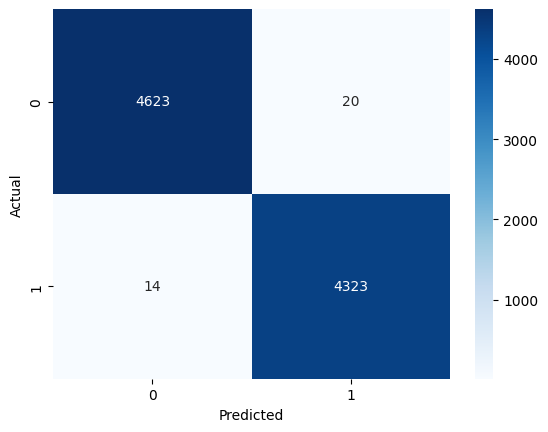

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔎 Observation:

A heatmap of the confusion matrix was plotted using seaborn.
The matrix shows how many Fake and Real news items were correctly classified.

Diagonal values (top-left & bottom-right) represent correct predictions.

Off-diagonal values represent errors (misclassified news).
This visualization gives a clear picture of model performance beyond accuracy.